### aim: 

### date: 

In [11]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [12]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [13]:
import numpy as np
from cmocean import cm
import cartopy as cp
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr

%matplotlib inline
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
import cartopy.feature as cfeature
from importlib import reload
import matplotlib.path as mpath
import glob
import pickle
import pandas as pd
import seawater
import time
plt.rcParams.update({'font.size': 13})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 13}
plt.rcParams['text.usetex'] = True
plt.rc('font', **font)

In [14]:
prod = {
    'UKESM': {
        'col': 'r',},
    'NCEP-NCAR': {
        'col': 'y',},
    'NCEP-DOE': {
        'col': 'b',},
    'ERA5': {
        'col': 'g',},
}

In [15]:
def make_yearlist(yrst, yrend, prod, \
                 baseDir = '/gpfs/data/greenocean2/software/products/windsFromComponents/dailyStandard/'):
    yrs = np.arange(yrst,yrend+1,1)
    ylist = []
    for i in range(0,len(yrs)):
        ty = f'{baseDir}/{prod}/{prod}_wind_daily_1x1_{yrs[i]}.nc'
        t2 = glob.glob(ty)
        #print(t2)
        ylist.append(t2[0])
    return ylist

#,

In [52]:
ex = False

if ex:
    
    ncar = xr.open_mfdataset(make_yearlist(1980, 2019, 'NCEP-NCAR'))
    doe = xr.open_mfdataset(make_yearlist(1980, 2019, 'NCEP-DOE'))
    era = xr.open_mfdataset(make_yearlist(1980, 2019, 'ERA5'))
    ukesm = xr.open_mfdataset(make_yearlist(1980, 2019, 'UKESM'))

    sdir = '/gpfs/data/greenocean2/software/products/windsFromComponents/dailyStandard/intProc/'

    eradjf = era.wspd10m.sel(time_counter=(era['time_counter.season'] == 'DJF')).mean(dim = ['time_counter'])
    erajja = era.wspd10m.sel(time_counter=(era['time_counter.season'] == 'JJA')).mean(dim = ['time_counter'])
    erafy = era.wspd10m.mean(dim = ['time_counter'])

    eradjf.to_netcdf(f'{sdir}/era_djf_1980-2019.nc')
    erajja.to_netcdf(f'{sdir}/era_jja_1980-2019.nc')
    erafy.to_netcdf(f'{sdir}/era_fy_1980-2019.nc')
    
    print('ok')

    doedjf = doe.wspd10m.sel(time_counter=(doe['time_counter.season'] == 'DJF')).mean(dim = ['time_counter'])
    doejja = doe.wspd10m.sel(time_counter=(doe['time_counter.season'] == 'JJA')).mean(dim = ['time_counter'])
    doefy = doe.wspd10m.mean(dim = ['time_counter'])

    doedjf.to_netcdf(f'{sdir}/doe_djf_1980-2019.nc')
    doejja.to_netcdf(f'{sdir}/doe_jja_1980-2019.nc')
    doefy.to_netcdf(f'{sdir}/doe_fy_1980-2019.nc')

    print('ok')    
    
    ncardjf = ncar.wspd10m.sel(time_counter=(ncar['time_counter.season'] == 'DJF')).mean(dim = ['time_counter'])
    ncarjja = ncar.wspd10m.sel(time_counter=(ncar['time_counter.season'] == 'JJA')).mean(dim = ['time_counter'])
    ncarfy = ncar.wspd10m.mean(dim = ['time_counter'])

    ncardjf.to_netcdf(f'{sdir}/ncar_djf_1980-2019.nc')
    ncarjja.to_netcdf(f'{sdir}/ncar_jja_1980-2019.nc')
    ncarfy.to_netcdf(f'{sdir}/ncar_fy_1980-2019.nc')

    print('ok')    
    
    ukesmdjf = ukesm.wspd10m.sel(time_counter=(ukesm['time_counter.season'] == 'DJF')).mean(dim = ['time_counter'])
    ukesmjja = ukesm.wspd10m.sel(time_counter=(ukesm['time_counter.season'] == 'JJA')).mean(dim = ['time_counter'])
    ukesmfy = ukesm.wspd10m.mean(dim = ['time_counter'])

    ukesmdjf.to_netcdf(f'{sdir}/ukesm_djf_1980-2019.nc')
    ukesmjja.to_netcdf(f'{sdir}/ukesm_jja_1980-2019.nc')
    ukesmfy.to_netcdf(f'{sdir}/ukesm_fy_1980-2019.nc')
    
    print('ok')

In [54]:
ukesmdjf = xr.open_dataset(f'{sdir}/ukesm_djf_1980-2019.nc')
ukesmjja = xr.open_dataset(f'{sdir}/ukesm_jja_1980-2019.nc')
ukesmfy = xr.open_dataset(f'{sdir}/ukesm_fy_1980-2019.nc')

ncardjf = xr.open_dataset(f'{sdir}/ncar_djf_1980-2019.nc')
ncarjja = xr.open_dataset(f'{sdir}/ncar_jja_1980-2019.nc')
ncarfy = xr.open_dataset(f'{sdir}/ncar_fy_1980-2019.nc')

doedjf = xr.open_dataset(f'{sdir}/doe_djf_1980-2019.nc')
doejja = xr.open_dataset(f'{sdir}/doe_jja_1980-2019.nc')
doefy = xr.open_dataset(f'{sdir}/doe_fy_1980-2019.nc')

eradjf = xr.open_dataset(f'{sdir}/era_djf_1980-2019.nc')
erajja = xr.open_dataset(f'{sdir}/era_jja_1980-2019.nc')
erafy = xr.open_dataset(f'{sdir}/era_fy_1980-2019.nc')

ukesmdjfws = ukesmdjf.wspd10m.values
ukesmjjaws = ukesmjja.wspd10m.values
ukesmfyws = ukesmfy.wspd10m.values

ncardjfws = ncardjf.wspd10m.values
ncarjjaws = ncarjja.wspd10m.values
ncarfyws = ncarfy.wspd10m.values

doedjfws = doedjf.wspd10m.values
doejjaws = doejja.wspd10m.values
doefyws = doefy.wspd10m.values

eradjfws = eradjf.wspd10m.values
erajjaws = erajja.wspd10m.values
erafyws = erafy.wspd10m.values


In [72]:
def plot_southern(fig, ax1, lons, lats, tdat, tvmin, 
                  tvmax, tticks, fs = 12, 
                  tit = '', cbarlab = '', tcmap = 'viridis', lm = True, cbr = True):
   
    ax1.set_extent([-180, 180, -80, -28], ccrs.PlateCarree())
    #make that circle
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)
    ax1.set_boundary(circle, transform=ax1.transAxes)
    # lons = nav_lon[0:50,:]; lats = nav_lat[0:50,:]; 
    mesh = ax1.pcolormesh(lons, lats, tdat, cmap = tcmap, vmin = tvmin, vmax = tvmax, 
                     transform=ccrs.PlateCarree())
    
    ax1.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '110m', 
                                                 edgecolor='face', facecolor='k'))

    ax1.set_title(tit, fontsize = fs)
    cb = 0
    

    
    if cbr:
        
        cbar_ax = fig.add_axes([0.2, 0.06, .6, .03]) #left, bottom, width, height
        fig.colorbar(mesh, cax=cbar_ax, orientation="horizontal", label = 'm s$^{-1}$')
        # cb = fig.colorbar(mesh, ax = ax1, orientation = 'horizontal',
        #              pad = 0.06, fraction = 0.045, shrink = 0.9)
        # cb.set_label(label=cbarlab,fontsize = 8)
        # cb.set_ticks(tticks, fontsize = 80)
        # cb.ax.tick_params(labelsize=8)
    return cb

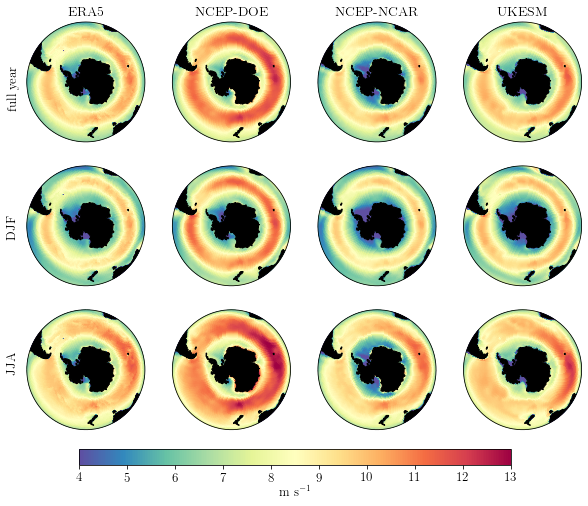

In [82]:
spbot = 4; sptop = 13; spint = 2
difbot = -2; diftop = 2.1; difint = 1
tcm = 'Spectral_r'
fs = 13

lats = erafy.lat
lons = erafy.lon

fact = 0.25
fig = plt.figure(figsize=[40*fact, 30*fact])


toplot = [erafyws, doefyws, ncarfyws, ukesmfyws,\
         eradjfws, doedjfws, ncardjfws, ukesmdjfws,\
         erajjaws, doejjaws, ncarjjaws, ukesmjjaws]
      
cms = [tcm,tcm,tcm,tcm,tcm,tcm,tcm,tcm,tcm,tcm,tcm,tcm]
bb = [spbot,spbot,spbot,spbot,spbot,spbot,spbot,spbot,spbot,spbot,spbot,spbot]
tb = [sptop,sptop,sptop,sptop,sptop,sptop,sptop,sptop,sptop,sptop,sptop,sptop]
intvl = [spint,spint,spint,spint,spint,spint,spint,spint,spint,spint,spint,spint]
tits = ['ERA5','NCEP-DOE','NCEP-NCAR','UKESM','','','','','','','','','','','','',]

#test = seasmean_map_ts_ukesm[0,0,:,:]


for i in range(0,12):
    test = toplot[i]
    botbound = bb[i]
    topbound = tb[i]
    
    tint = intvl[i]
    tcbr = False
    if i == 11:
        tcbr = True
    # if i < 3:
    #     tcbr = False
    # else:
    #     tcbr = False
    ax1 = fig.add_subplot(3, 4, i+1, projection=ccrs.Orthographic(0, -90))
    bc = plot_southern(fig, ax1, lons, lats, test, botbound, 
                  topbound, np.arange(botbound,topbound,tint), fs = 14, 
                  tit =tits[i], cbarlab = 'm/s', tcmap = cms[i], lm = True, cbr = tcbr)

tx = 0.1
fig.text(tx,0.72,'full year', rotation = 90, fontsize = fs)
fig.text(tx,0.48,'DJF', rotation = 90, fontsize = fs)
fig.text(tx,0.23,'JJA', rotation = 90, fontsize = fs)
#plt.suptitle('seasonal wind speed climatology, 1950-2020', y = 0.90)
plt.tight_layout()
#fig.savefig('./figs/Fig_climatologymap_UKESM_ERA.jpg', dpi = 300)